### *“At the end of the day, we can endure much more than we think we can.”* 
*-Frida Kahlo, 20th-century Mexican painter*

----

YOUR NAME HERE: Travis Kerr

----

# Lab: Bar Graphs and Group By

---

## Add to your cheat sheet!

Add info about bar graphs from this lab to your cheat sheet, so that you can easily look things up when working on your final project.

---

### Setting up our data ###

Import the needed packages by running this cell.

Begin by importing the new plotting package below.

In [1]:
import numpy as np                 #for processing arrays (columns)
import pandas as pd                #for processing dataframes  (tables)
import sqlite3 as sql              #for SQL of course!
import matplotlib.pyplot as plt    #for making visualizations!
plt.style.use('fivethirtyeight')   #A helpful style package

### Visualizing Categorical Distributions ###

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

Below I set up an  `icecream` dataframe that contains data on 30 cartons of ice-cream. 

In [2]:
icecream_dict = {'Flavor' : np.array(['Chocolate', 'Strawberry', 'Vanilla']),
                 'Number of Cartons' : np.array([16, 5, 9])}

icecream = pd.DataFrame(icecream_dict)
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


The *values* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. We call this a *distribution table*. A *distribution* shows all the values of a variable, along with the frequency of each one.

### Bar Chart ###
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

The `bar` method from the `plt` package takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

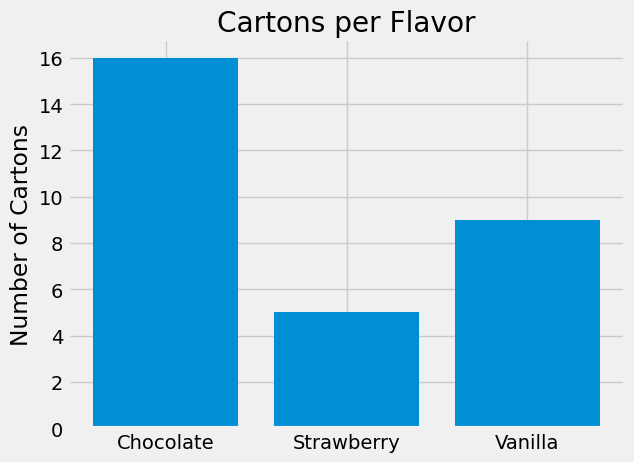

In [3]:
plt.bar(icecream['Flavor'], icecream['Number of Cartons'])
plt.ylabel('Number of Cartons')
plt.title('Cartons per Flavor');

We will often draw bar charts with horizontal bars because it's easier to label the bars that way. The method to use here is called `barh` and it takes the same input as `bar`.

Text(0.5, 1.0, 'Cartons per Flavor')

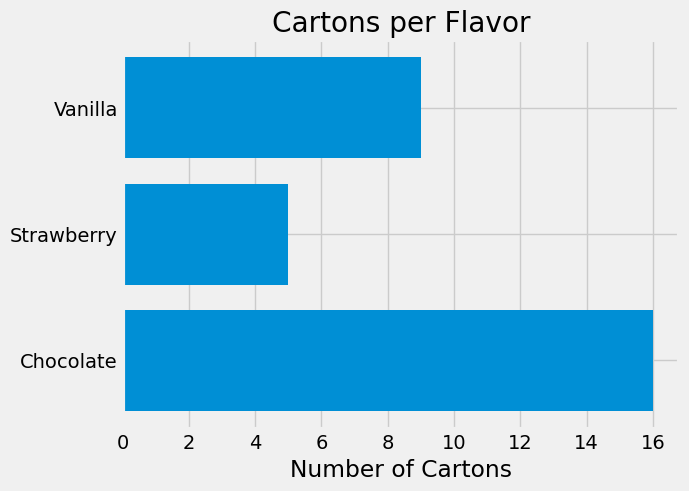

In [4]:
plt.barh(icecream['Flavor'], icecream['Number of Cartons'])
plt.xlabel('Number of Cartons')
plt.title('Cartons per Flavor')

### Features of Categorical Distributions 

Apart from purely visual differences, there is an important fundamental distinction between bar charts and the two graphs that we saw in the previous sections. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. **In contrast, the bar chart has categories on one axis and numerical frequencies on the other.**

This has consequences for the chart. First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

**Most importantly, the bars can be drawn in any order.** The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, you can either:

* Use the ORDER BY command in SQL.  *We cannot use this option for the ice cream data because it was not loaded in by a SQL query.*

* Sort by using Python, that is, use the Python ```sort_values``` function  for data frames which has this syntax:

  * ```nba.sort_values(by='SALARY') #Sorts the Salary col of the nba dataframe in ascending order ```

  * ```nba.sort_values(by='SALARY', ascending=False) #Sorts Descending (Lowest to Highest)```

We'll use the second option to first rearrange the rows of `icecream` in decreasing order of `Number of Cartons`, and then draw the bar chart.

---

# **Question 1**

A) Sort the icecream chart so that it is ascending in its number of cartons

In [5]:
#sort here with Python - no SQL
icecream = icecream.sort_values(by='Number of Cartons', ascending=False)
icecream 

,Flavor,Number of Cartons
0,Chocolate,16
2,Vanilla,9
1,Strawberry,5


B) Now redraw the barchart (using the `bar` command) so that from left to right the flavors are in descending order,ie, Chocolate before Vanilla before Strawberry

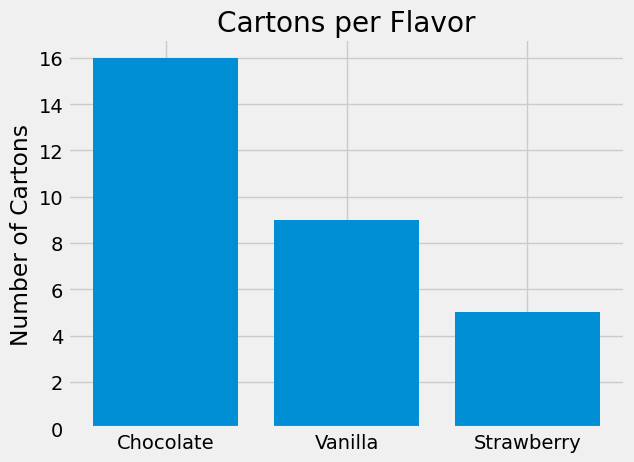

In [ ]:
#bar graph code here
icecream = icecream.sort_values(by='Number of Cartons', ascending=False)
plt.bar(icecream['Flavor'], icecream['Number of Cartons'])
plt.ylabel('Number of Cartons')
plt.title('Cartons per Flavor');

C) Finally, redraw the horizontal barchart (using the `barh` command) so that from top to bottom the flavors are in descending order,ie, Chocolate above Vanilla above Strawberry

Text(0.5, 1.0, 'Cartons per Flavor')

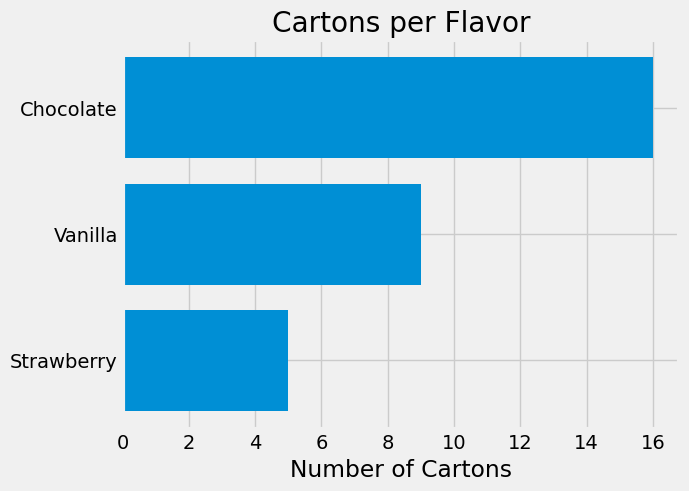

In [ ]:
#horiztonal bar graph here
icecream = icecream.sort_values(by='Number of Cartons', ascending=True)
plt.barh(icecream['Flavor'], icecream['Number of Cartons'])
plt.xlabel('Number of Cartons')
plt.title('Cartons per Flavor')

---

### Rule of Thumb:  Always sort the categories in a bar chart.  

The sorted bar charts in the previous question contains exactly the same information as before, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

So always sort the categories in a bar chart. The only exception is when there is a natural ordering on the x axis.  For example, below, the categories are years and it is natural to show years from earliest to latest.

![shark-bar-chart](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/shark_barchart.png?raw=true)



---
### Grouping Categorical Data ###

To construct the table `icecream`, someone had to look at all 30 cartons of ice-cream and count the number of each flavor. SQL allows us to do that with the GROUP BY clause, so we can use a GROUP BY clause and then use it to create a visualization.

For the next question, we'll use these 2 columns from the partner perferences survey that I gave last semester in class:

 * Partner_Preference:  Would you like a partner for the final project? 
 * Python_Feeling:  Rate how you are feeling with Python  (1-5 with 5 meaning you feel very strong.)
 
Let's load in the partner preferences data.

In [7]:
try:
    #Read in the needed csvs and create the DB
    preferences = pd.read_csv('partner_preferences.csv')
    conn = sql.connect('preferences.db')
    preferences.to_sql('preferences', conn,  index = False)

except:
    
    print("Issue during DB creation/connection")

In [8]:
sql_statement = """SELECT * 
                   FROM preferences"""

preferences = pd.read_sql_query(sql_statement, conn)  #Call the results game_stop
preferences

,Partner_Preference,Python_Feeling
0,Yes,5
1,No preference,5
2,Yes,3
3,Yes,2
4,Yes,4
5,Yes,4
6,Yes,3
7,Yes,3
8,Yes,4
9,Yes,2


---
# **Question 2**

A) STEP 1: Use SQL to get a count of how many people rated their feeling with Python as a 1, 2, 3, 4, 5.  Call the second column ```num_students```.


In [9]:
sql_statement = """SELECT DISTINCT(Python_Feeling), COUNT(*) as num_students
                    FROM preferences
                    GROUP BY Python_Feeling """

pref_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
pref_counts

,Python_Feeling,num_students
0,2,3
1,3,5
2,4,4
3,5,4


B) ASIDE: Notice no one opted to choose a "1", so we can add a count of 0 for "1" to our table.

To do this, we'll add a union statement to your SQL statement.  Go ahead  and replaces the ellipsis below with your SQL statement from (A).  This should generate the table below.

|   | Python_Feeling | num_students |
|--:|---------------:|-------------:|
| 0 | 2              | 3            |
| 1 | 3              | 5            |
| 2 | 4              | 4            |
| 3 | 5              | 4            |

In [10]:
sql_statement = """ SELECT DISTINCT(Python_Feeling), COUNT(*) as num_students
                    FROM preferences
                    GROUP BY Python_Feeling

                    UNION
                    
                    SELECT 1, 0   --This creates a new record/row with 2 columns that contain a 1 then a 0.
                   
                   """

pref_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
pref_counts

,Python_Feeling,num_students
0,1,0
1,2,3
2,3,5
3,4,4
4,5,4


C) STEP 2:  Create a bar chart for this data.  Use ``bar`` instead of ``barh`` here.

Be sure to:

 * Label the y axis with "Number of Students"
 * Give the graph a title of "Feeling with Python".

Text(0.5, 1.0, 'Feeling with Python')

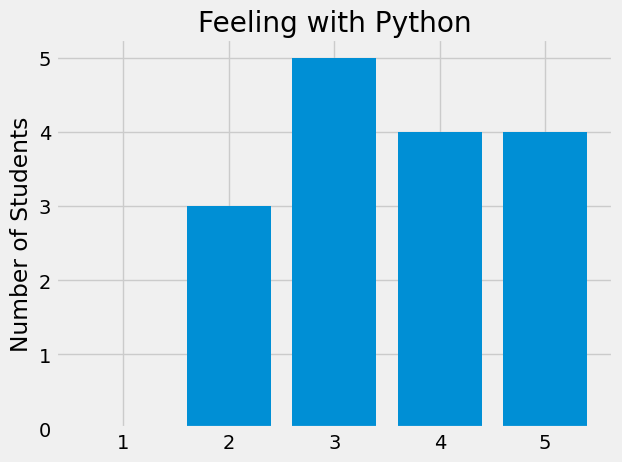

In [19]:
#Bar chart code here
plt.bar(pref_counts['Python_Feeling'], pref_counts['num_students'])
plt.ylabel("Number of Students")
plt.title("Feeling with Python")

Notice how python sorted the categories on the x axis for you, since the categories (1,2,3,4,5)  were numerical.

---

# **Question 3**

Build this bar chart **EXACTLY**, including the ordering.  Notice here the bars are out of order, but having 'Yes' and 'No' next to each other makes sense here.

![partner-prefs-image](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/partner_prefs.png?raw=true)

**HINT:**  

* Ignore order to start.  So build the chart with 'Yes', 'No', 'No preference' and don't worry about what order the categories are in.
* Once you have the bar plot showing in the wrong order, create a new column called "order" with the desired order. Hardcode the values in this column so that the "Yes" row has a 1, "No" has a 2, and "No preference" has a 3.  
  * Recall that this creates a new column with all 1's: ```table['new_col'] = 1```
  * You can have a list on the right hand side instead of a single number. So this code would add the column below to a 5 row table: ```table['new_col'] = [3, 5, 2, 4, 1]```
  | new_col |
|---------|
| 3       |
| 5       |
| 2       |
| 4       |
| 1       |
* Finally, sort on this new column to get the bars in the right order.

In [20]:
#SQL command here.  The resulting table should have a No row with a 0.
sql_statement = """ SELECT Partner_Preference, COUNT(Partner_Preference) AS num_students
                    FROM preferences
                    GROUP BY Partner_Preference

                    UNION

                    SELECT "No",0
                   """

partner_counts = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
partner_counts

,Partner_Preference,num_students
0,No,0
1,No preference,3
2,Yes,13


In [21]:
partner_counts['order'] = [2,3,1]
partner_counts

,Partner_Preference,num_students,order
0,No,0,2
1,No preference,3,3
2,Yes,13,1


Text(0.5, 1.0, 'Partner Preference')

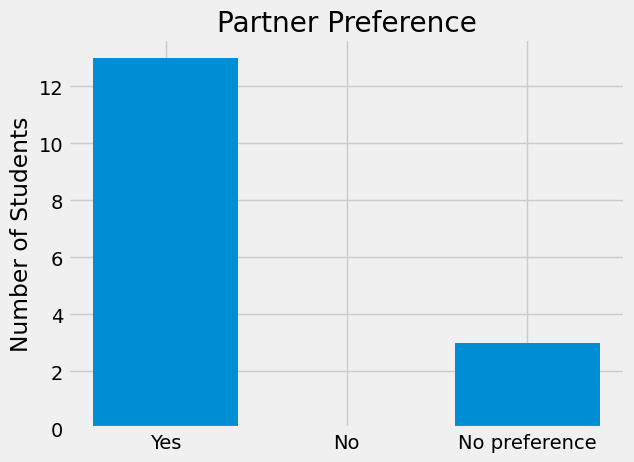

In [22]:
#Now create the bar chart using the hint
partner_counts = partner_counts.sort_values(by=['order'])

partner_counts
plt.bar(partner_counts['Partner_Preference'], partner_counts['num_students'])
plt.ylabel('Number of Students')
plt.title('Partner Preference')

---


Let's close the partner preference database so we can open another.

In [23]:
#close previous connection - run this cell
conn.close()

---

# The Iris Data Set

We are going to look at a data set about irises.  The iris data set consists of information about 3 different types of irises (0-Setosa, 1-Versicolour, and 2-Virginica), specifically their petal and sepal length.

![image.png](https://plantid.net/Classic/Glossary/Sepal_files/image001.png)


To generate this data set, 150 iris flowers were sampled and their Sepal Length, Sepal Width, Petal Length and Petal Width, all in centimeters, were recorded.

In [24]:
try:
    #Read in the needed csvs and create the DB
    iris = pd.read_csv("iris.data")
    conn = sql.connect('iris.db')
    iris.to_sql('iris', conn,  index = False)

except:
    
    print("Issue during DB creation/connection")

In [25]:
sql_statement = """
                SELECT * FROM iris
                   
                """

iris = pd.read_sql_query(sql_statement, conn )  #Call the results game_stop
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


---

# Question 4

Generate a table of the average sepal length/width and average petal length/width per type, as shown below.

Be sure to rename the columns as shown.

|   |            type | avg_sepal_length | avg_sepal_width | avg_petal_length | avg_petal_width |
|--:|----------------:|-----------------:|----------------:|-----------------:|----------------:|
| 0 | Iris-setosa     | 5.006            | 3.418           | 1.464            | 0.244           |
| 1 | Iris-versicolor | 5.936            | 2.770           | 4.260            | 1.326           |
| 2 | Iris-virginica  | 6.588            | 2.974           | 5.552            | 2.026           |

In [27]:
sql_statement = """
                SELECT class AS type, AVG(sepal_length) AS avg_sepal_length, 
                        AVG(sepal_width)AS avg_sepal_width,
                        AVG(petal_length) AS avg_petal_length,
                        AVG(petal_width) AS avg_petal_width
                FROM iris
                GROUP BY class
                   
                """

iris_grped = pd.read_sql_query(sql_statement, conn )  #Call the results iris_grped
iris_grped

,type,avg_sepal_length,avg_sepal_width,avg_petal_length,avg_petal_width
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


B) Generate a bar graph showing the average_sepal_length per iris type.

**Be sure of course to sort the bars from highest to lowest and to label both axes and give a professional title.**

Here's how my final graph looked: [Click here for a picture](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/iris_bar.PNG)

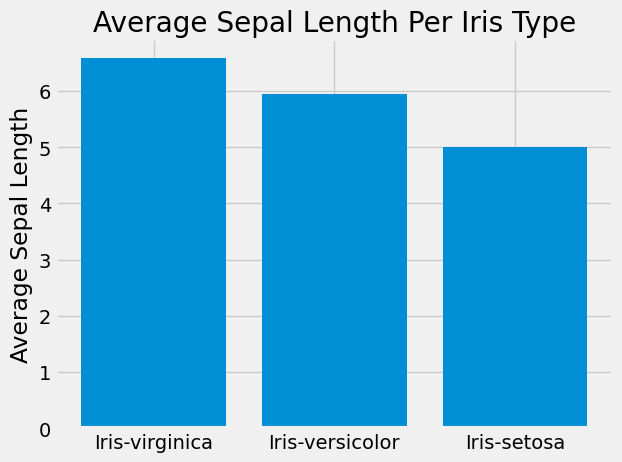

In [28]:
# bar chart code here
iris_grped= iris_grped.sort_values(by='avg_sepal_length', ascending=False)
iris_grped 
plt.bar(iris_grped['type'], iris_grped['avg_sepal_length'])
plt.ylabel('Average Sepal Length')
plt.title('Average Sepal Length Per Iris Type');

---

# **Question 5**

We want to determine if petal width and sepal width are related so we choose to do a scatter plot.

Draw this graph exactly.   Essentially, you have to get a dataframe per iris type and draw 3 scatter plots on one graph to accomplish this.  Below, I give you some hints on how to do this.

<!--![Iris Scatter](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/iris_scatter.PNG)-->

<img src="https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/iris_scatter.PNG"  width="50%" height="50%">

HINTS: 

* You will need to have 3 ```plt.scatter``` calls **within ONE code cell**.  Python will draw each with a different color.
* Creating a legend is a 2 step process.
  * First, you need to tell Python which color/scatter plot goes with each iris type.  You do this by using a parameter of ```label =  `XXX` ``` in each ```plt.scatter(...)``` call.  
    * The value ```'XXX'``` should be whatever you wish the plot to be labeled as in the legend.
  * Second, you will need to tell Python to show the legend.  Adding this line of code at the end of your code cell will do just that: 
    * ```plt.legend()```
  * If the legend appears at a bad point on the graph, meaning, if it covers up some data, you can use this version to move it to the outside:
    * ```plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')```

In [30]:
#first SQL query - give the results a good name - Go copy from another cell to get yourself started.
sql_statement = """

                  SELECT petal_width, sepal_width
                  FROM iris
                  WHERE class = "Iris-setosa"

"""
setosa = pd.read_sql_query(sql_statement, conn)
setosa

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2
3,0.2,3.1
4,0.2,3.6
5,0.4,3.9
6,0.3,3.4
7,0.2,3.4
8,0.2,2.9
9,0.1,3.1


In [31]:
#second SQL query - give the results a good name
sql_statement = """

                  SELECT petal_width, sepal_width
                  FROM iris
                  WHERE class = "Iris-virginica"

"""
virginica = pd.read_sql_query(sql_statement, conn)
virginica

,petal_width,sepal_width
0,2.5,3.3
1,1.9,2.7
2,2.1,3.0
3,1.8,2.9
4,2.2,3.0
5,2.1,3.0
6,1.7,2.5
7,1.8,2.9
8,1.8,2.5
9,2.5,3.6


In [34]:
#third SQL query - give the results a good name
sql_statement = """

                  SELECT petal_width, sepal_width
                  FROM iris
                  WHERE class = "Iris-versicolor"

"""
versicolor = pd.read_sql_query(sql_statement, conn)
versicolor

,petal_width,sepal_width
0,1.4,3.2
1,1.5,3.2
2,1.5,3.1
3,1.3,2.3
4,1.5,2.8
5,1.3,2.8
6,1.6,3.3
7,1.0,2.4
8,1.3,2.9
9,1.4,2.7


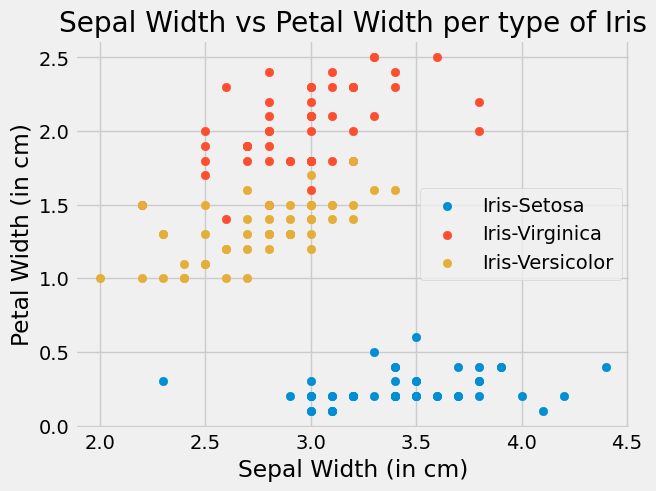

In [35]:
#All your plotting code should be in this cell.

plt.scatter(setosa["sepal_width"], setosa["petal_width"], label = "Iris-Setosa")
plt.scatter(virginica["sepal_width"], virginica["petal_width"], label = "Iris-Virginica")
plt.scatter(versicolor["sepal_width"], versicolor["petal_width"], label = "Iris-Versicolor")
plt.title("Sepal Width vs Petal Width per type of Iris")
plt.xlabel("Sepal Width (in cm)")
plt.ylabel("Petal Width (in cm)")
plt.legend()

B)  Looking at the plot, for which type does the sepal width and the petal width seem to be correlated the most?

*Your answer here*

Click __here__ for a good answer 

<!-- The iris-setosa seems to be pretty horizontal and not very linearly related.  So this likely has the lowest correlation.  It does not seem that as the sepal width grows for iris-setosa, the petal width grows/descreases linearly.

It's hard to tell using the eye alone whether the iris-virginica versus iris-versicolor dots fall closer to a straight line.  However, the iris-versicolor look tighter about a line to me.-->

C)  Now set up 3 values for the correlation coefficient of each type.

In [ ]:
#You don't need to do anything in this code cell but you can use it to check your work.
#Add whatever code cells you need ABOVE this cell to set up these 3 variables:
# r_iris_setosa, r_iris_virginica, r_iris_versicolor

#If your code is right, then when you run this cell, you will see this printed.
#     iris-setosa: 0.27997288851690416 
#     iris-virginica: 0.5377280262661884 
#     iris-versicolor 0.6639987200241112

print("iris-setosa:", r_iris_setosa, 
      "\niris-virginica:", r_iris_virginica, 
      "\niris-versicolor", r_iris_versicolor )

iris-setosa: (1,) 
iris-virginica: 1 
iris-versicolor 1


In [36]:
new_corr = setosa.corr()
new_corr
r_iris_setosa = new_corr["petal_width"]["sepal_width"]
r_iris_setosa

0.27997288851690405

In [37]:
new_corr = virginica.corr()
new_corr
r_iris_virginica = new_corr["petal_width"]["sepal_width"]
r_iris_virginica

0.5377280262661883

In [38]:
new_corr = versicolor.corr()
new_corr
r_iris_versicolor = new_corr["petal_width"]["sepal_width"]
r_iris_versicolor

0.6639987200241115

D) Do the correlation coefficients support out answer in (C)?  

*Yes it does, because we see the Veriscolor has the highest correlation at .66. This then means that the sepal and petal width has a strong and moderate coordination.*

Click __here__ for a good answer 

<!-- Yes!  We see the iris-setosa's coeffiicent is 0.28 which shows a weak positive linear correaltion, as we thought.

The iris-versicolor (0.66) and the iris-virginica (0.54) have moderately strong correlation coefficients and so both show a positive linear association between petal width and sepal width, meaning, as petal width increases, so does sepal width.-->

---

In [39]:
#now close previous connection - run this cell
conn.close()

##  Suggestions for Cheat sheet

Do you have examples of these in your cheat sheet?

* How to make a bar graph
* How to make a horizontal bar graph
* How to sort with Python and SQL
* How to create a legend when putting mutliple plots on a graph.

---

You're done!  Yay!